# MultiClass Classification

## Problem Statement
The objective of the dataset is to Predict whether conditions is :'drizzle', 'rain', 'sun', 'snow', 'fog' 

This is multiclass classification model to predict weather condition.


# Data Defining
Based on some factor we are, going to predict the weathers..

**Input Variables:**

1) **date:**Date is started from 01-01-2012 to 31-12-2015.	

2) **precipitation:**  All forms in which water falls on the land surface and open water bodies as rain, sleet, snow, hail, or drizzle

3) **temp_max:**	Maximum temperature of a particular day.

4) **temp_min:**	Minimum temperature of a particular day.

5) **wind:** Wind speed	(Km/hr)

**Target Variable:**

6) **weather:** weathers types('drizzle', 'rain', 'sun', 'snow', 'fog')


Steps 

1. Import Packages
2. Set Options
3. Read the Data
4. Understand and Prepare the Data
4.1 Data Types and Dimensions
4.2 Stastical Summary
4.3 Missing Data Treatment
4.4 Visualization
4.5 Outlier Handling
4.6 Exploratory Data Analysis (EDA)
4.7 Correlation Matrix
4.8 Label Encoding of Target Variable
5. Prepare Data for Model Building 
5.1 Dividing data into dependent and independent components
5.2 Apply SMOTE to Balance the Data
5.3 Spliting Data into train and test
5.4 Shape of train and test set
5.5 Scale the Data
5.6 Defining Functions
6. Apply Classification Models
6.1 Logistic Regression
6.2 SVM
6.3 KNN
6.4 Naive Bayes
6.5 Decision Tree
6.6 Random Forest
6.7 XG Boost
6.8 Bagging Meta Estimator
7. Conclusion


<a id='import_packages'></a>
## 1. Import Packages

In [1]:
#Import the libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype

from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

import statsmodels
import statsmodels.api as sm

## 2. Set Options

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

np.set_printoptions(suppress=True)

<a id='Read_Data'></a>
## 3. Read the Data

In [3]:
df= pd.read_csv("../input/weather-prediction/seattle-weather.csv")
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [4]:
df.tail(10)

,date,precipitation,temp_max,temp_min,wind,weather
1451,2015-12-22,4.6,7.8,2.8,5.0,rain
1452,2015-12-23,6.1,5.0,2.8,7.6,rain
1453,2015-12-24,2.5,5.6,2.2,4.3,rain
1454,2015-12-25,5.8,5.0,2.2,1.5,rain
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


<a id='data_preparation'></a>
## 4. Understand and Prepare the Data

## 4.1 Data Types and Dimensions

In [5]:
df.shape

(1461, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

## 4.2 Stastical Summary

In [8]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [9]:
df.describe(include='object')

,date,weather
count,1461,1461
unique,1461,5
top,2012-01-01,rain
freq,1,641


## 4.3 Missing Data Treatment

In [10]:
Total = df.isnull().sum().sort_values(ascending = False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
date,0,0.0
precipitation,0,0.0
temp_max,0,0.0
temp_min,0,0.0
wind,0,0.0
weather,0,0.0


## 4.4 Visualization

In [11]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [12]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

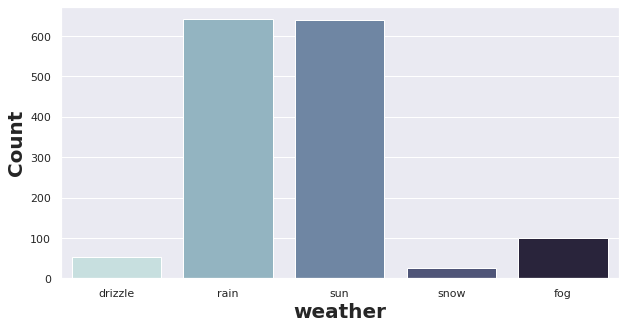

In [13]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = df,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=20)
plt.ylabel("Count",fontweight='bold',size=20)
plt.show()

In [14]:
#convert the data type into datetime
df['date'] = pd.to_datetime(df['date'])

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'precipitation'}>],
       [<AxesSubplot:title={'center':'temp_max'}>,
        <AxesSubplot:title={'center':'temp_min'}>],
       [<AxesSubplot:title={'center':'wind'}>, <AxesSubplot:>]],
      dtype=object)

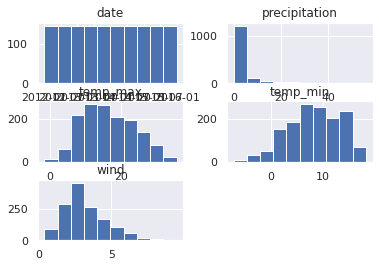

In [15]:
df.hist()

## 4.5 Outlier Handling

precipitation       AxesSubplot(0.125,0.536818;0.352273x0.343182)
temp_max         AxesSubplot(0.547727,0.536818;0.352273x0.343182)
temp_min               AxesSubplot(0.125,0.125;0.352273x0.343182)
wind                AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

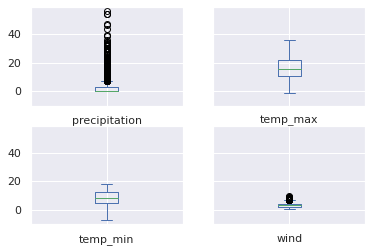

In [16]:
df.plot(kind='box', subplots=True, layout=(2, 2), sharex=True, sharey=True)

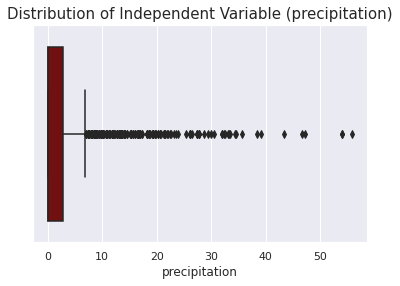

In [17]:
sns.boxplot(df['precipitation'], color='maroon')

plt.title('Distribution of Independent Variable (precipitation)', fontsize = 15)

# display the plot
plt.show()

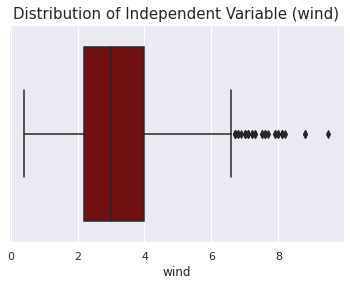

In [18]:
sns.boxplot(df['wind'], color='maroon')

plt.title('Distribution of Independent Variable (wind)', fontsize = 15)

# display the plot
plt.show()

In [19]:
df = df[df['precipitation'] < 20]

# check the dimension of the data
df.shape

(1410, 6)

## 4.6 Exploratory Data Analysis (EDA)

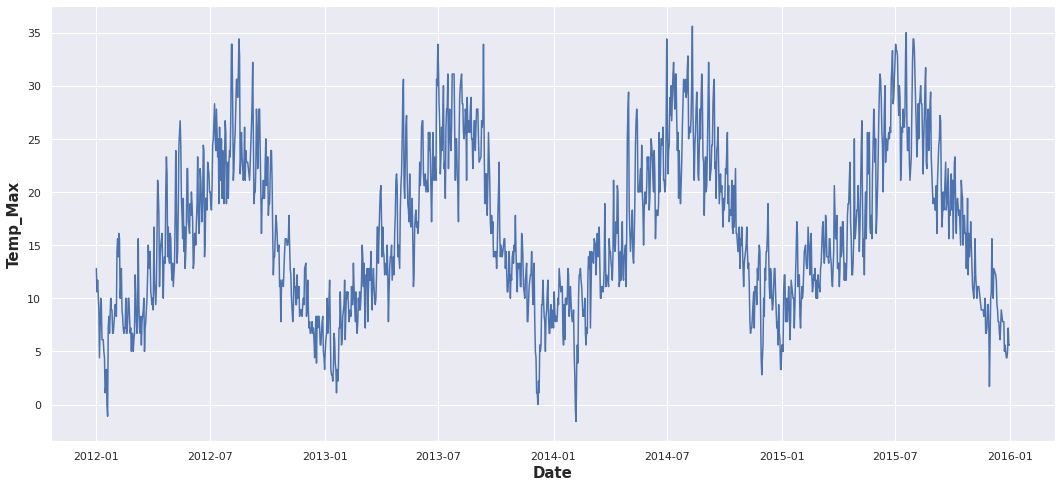

In [20]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=df)
plt.xlabel("Date",fontweight='bold',size=15)
plt.ylabel("Temp_Max",fontweight='bold',size=15)
plt.show()

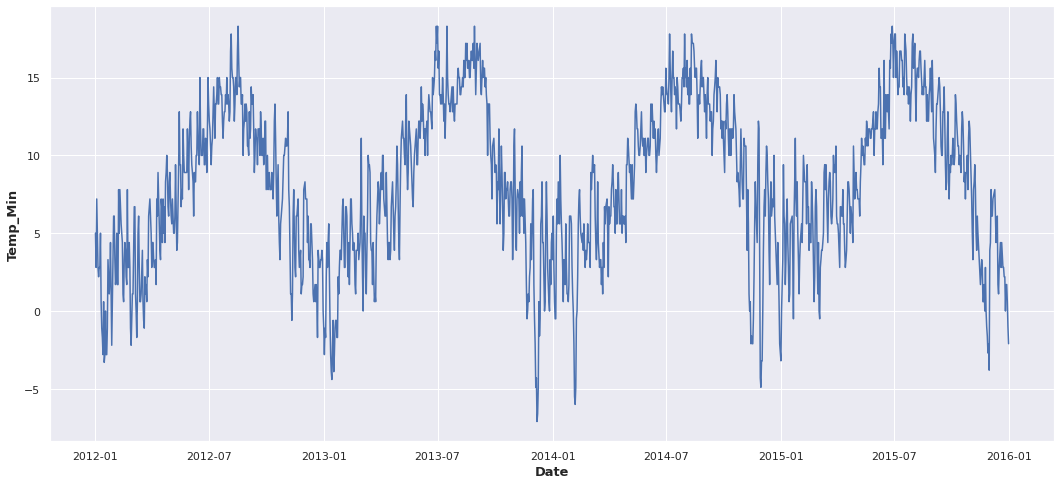

In [21]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_min',data=df)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Min",fontweight='bold',size=13)
plt.show()

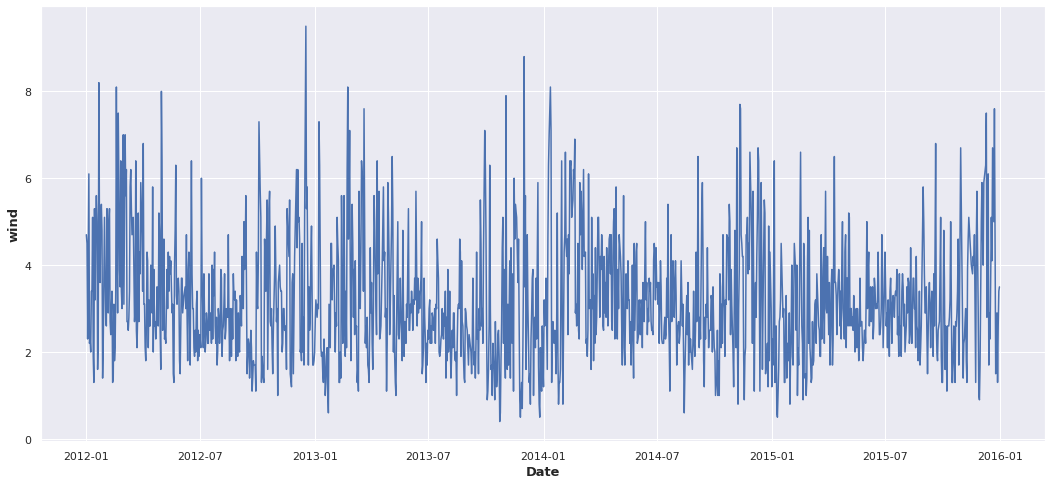

In [22]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='wind',data=df)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("wind",fontweight='bold',size=13)
plt.show()

<Figure size 1008x576 with 0 Axes>

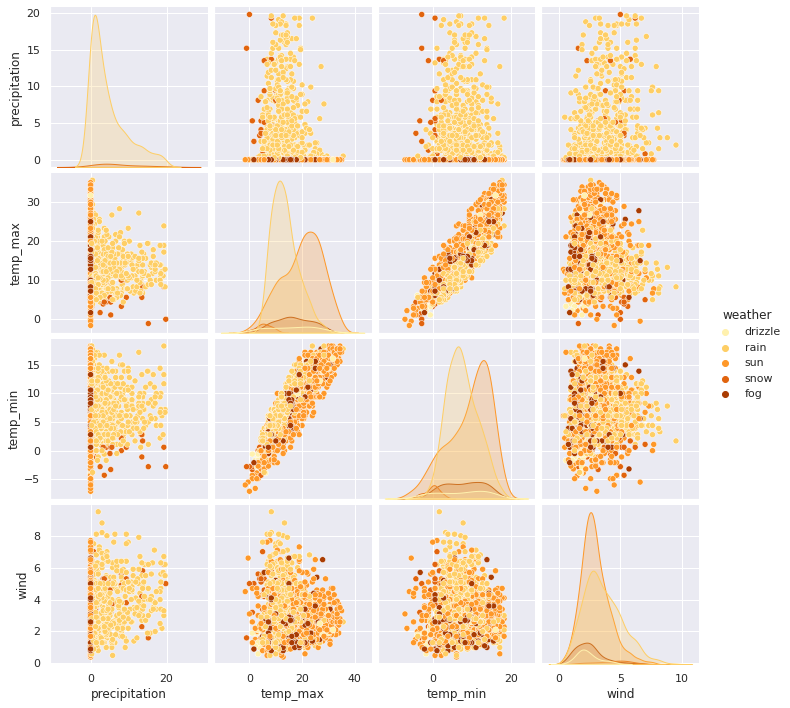

In [23]:
plt.figure(figsize=(14,8))
sns.pairplot(df.drop('date',axis=1),hue='weather',palette="YlOrBr")
plt.show()

<Figure size 720x360 with 0 Axes>

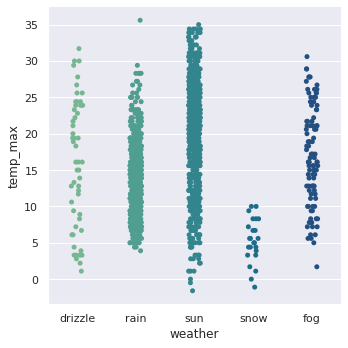

In [24]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=df,palette="crest")
plt.show()

<Figure size 720x360 with 0 Axes>

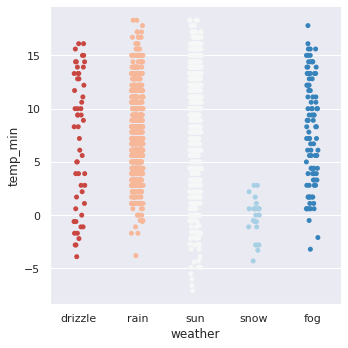

In [25]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=df,palette = "RdBu")
plt.show()

<Figure size 720x360 with 0 Axes>

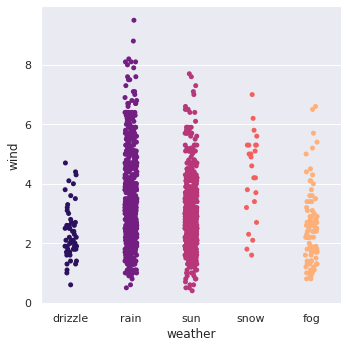

In [26]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='wind',data=df,palette = "magma")
plt.show()

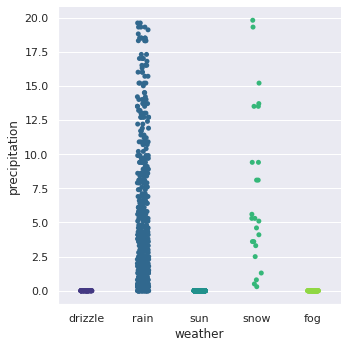

In [27]:
sns.catplot(x='weather',y ='precipitation',data=df,palette = "viridis")
plt.show()

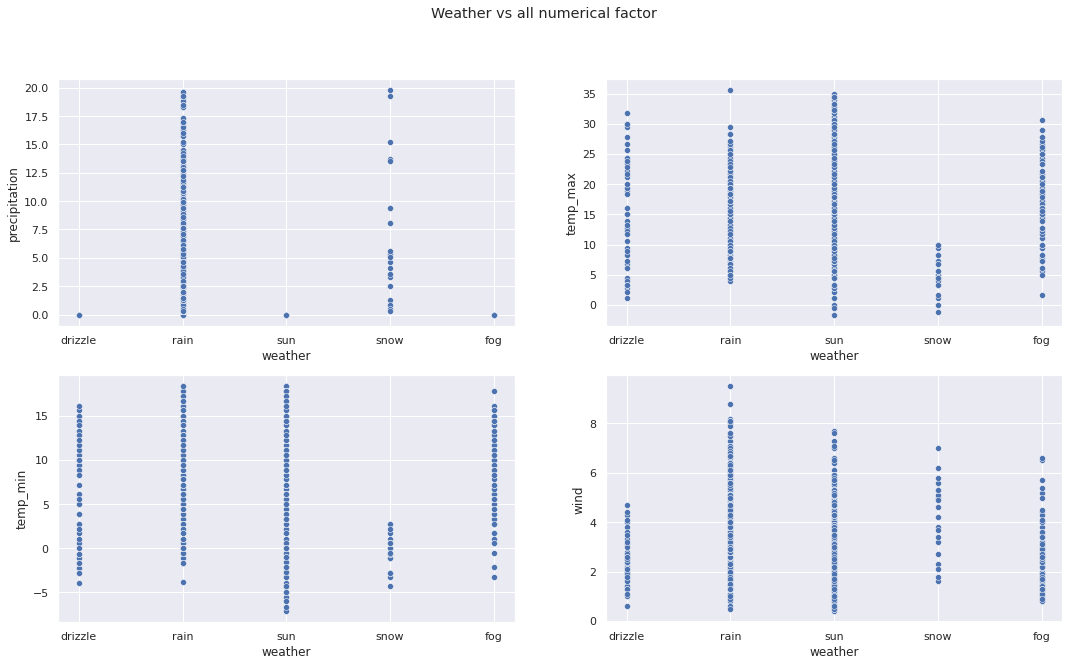

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Weather vs all numerical factor')

sns.scatterplot(ax=axes[0, 0], data=df, x='weather', y='precipitation')
sns.scatterplot(ax=axes[0, 1], data=df, x='weather', y='temp_max')
sns.scatterplot(ax=axes[1, 0], data=df, x='weather', y='temp_min')
sns.scatterplot(ax=axes[1, 1], data=df, x='weather', y='wind')
plt.show()

## 4.7 Correlation Matrix

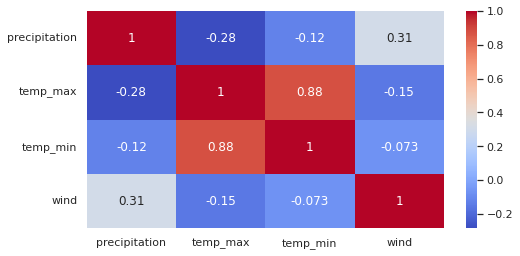

In [29]:
cor=df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

## 4.8 Label Encoding of Target Variable

In [30]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()
LABEL_ENCODING("weather")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
5,2012-01-06,2.5,4.4,2.2,2.2,2


## 5. Prepare Data for Model Building 

In [31]:
df = df.drop('date',axis=1)

## 5.1 Dividing data into dependent and independent components

In [32]:
x = df.drop('weather',axis=1)
y = df['weather']

## 5.2 Apply SMOTE to Balance the Data

In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=0, n=640 (20.000%)
Class=2, n=640 (20.000%)
Class=4, n=640 (20.000%)
Class=3, n=640 (20.000%)
Class=1, n=640 (20.000%)


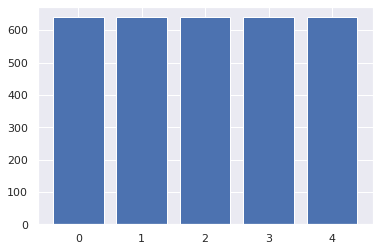

In [34]:
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v/len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## 5.3 Spliting Data into train and test

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

## 5.4 Shape of train and test set

In [36]:
print("*"*40)
print('\n')
print("Shape of x training data : ",X_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40, '\n')
print("Shape of x testing data : ",X_test.shape)
print("Shape of y testing data : ",y_test.shape)
print("*"*40)

****************************************


Shape of x training data :  (2400, 4)
Shape of y training data :  (2400,)
**************************************** 

Shape of x testing data :  (800, 4)
Shape of y testing data :  (800,)
****************************************


## 5.5 Scale the Data

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5.6 Defining Functions

## 1. Define Function for Classification Report

In [38]:
def get_test_report(model):
    return(classification_report(y_test, y_pred))

## 2.Define function for Kappa Score

In [39]:
def kappa_score(model):
    return(cohen_kappa_score(y_test,y_pred))

## 3.Define function for Confusion Matrix in the form of Heat map

In [40]:
def plot_confusion_matrix(model):
    cm = confusion_matrix(y_test, y_pred)
    
    conf_matrix= pd.DataFrame(data= cm, columns= ['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4'],
                             index= ['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4'])
    sns.heatmap(conf_matrix, annot= True, fmt='d', cmap= ListedColormap(['lightskyblue']),
               cbar= False, linewidths=0.1, annot_kws={'size': 25})
    
    plt.xticks(fontsize=15, fontweight='bold')
    plt.yticks(fontsize=15, fontweight='bold')
    
    plt.show()

## 4.Define fumction for adding all Model for Comparision (Tabulate The Result)

In [41]:
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(model_name):
    
    global score_card

    score_card = score_card.append({'Model': model_name,
                                    'Precision Score': metrics.precision_score(y_test, y_pred, pos_label='positive',average='micro'),
                                    'Recall Score': metrics.recall_score(y_test, y_pred, pos_label='positive',average='micro'),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred, pos_label='positive', average='micro')}, 
                                    ignore_index = True)
    return(score_card)

# 6. Apply Classification Models

# 6.1 Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
log_reg= classifier.fit(X_train, y_train)

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
print(get_test_report(log_reg))

              precision    recall  f1-score   support

           0       0.40      0.51      0.45       162
           1       0.33      0.23      0.27       163
           2       0.95      0.68      0.79       155
           3       0.90      0.95      0.93       146
           4       0.45      0.55      0.49       174

    accuracy                           0.58       800
   macro avg       0.61      0.59      0.59       800
weighted avg       0.59      0.58      0.58       800



In [45]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.57625


In [46]:
kappa_score(log_reg)

0.4692323048078315

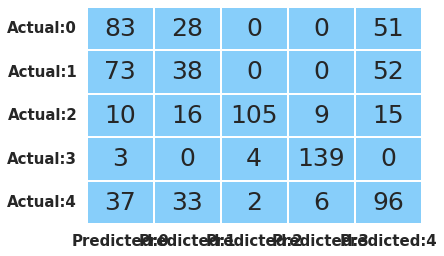

In [47]:
plot_confusion_matrix(log_reg)

In [48]:
update_score_card(model_name= 'Logistic Regression')

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.57625,0.57625,0.57625,0.469232,0.57625


# 6.2 Support Vector Machines (SVM)

In [49]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
SVC=classifier.fit(X_train, y_train)

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
print(get_test_report(SVC))

              precision    recall  f1-score   support

           0       0.41      0.52      0.46       162
           1       0.32      0.25      0.28       163
           2       0.97      0.73      0.83       155
           3       0.95      0.95      0.95       146
           4       0.47      0.55      0.51       174

    accuracy                           0.59       800
   macro avg       0.62      0.60      0.61       800
weighted avg       0.61      0.59      0.60       800



In [52]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc2}")

Accuracy score: 0.59125


In [53]:
kappa_score(SVC)

0.4880516018935829

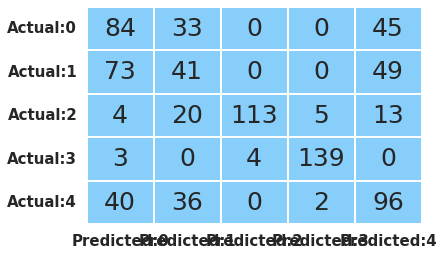

In [54]:
plot_confusion_matrix(SVC)

In [55]:
update_score_card(model_name='SVC')

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.57625,0.57625,0.57625,0.469232,0.57625
1,SVC,0.59125,0.59125,0.59125,0.488052,0.59125


# 6.3  K-Nearest Neighbors (KNN)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN=classifier.fit(X_train, y_train)

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
print(get_test_report(KNN))

              precision    recall  f1-score   support

           0       0.61      0.93      0.73       162
           1       0.65      0.75      0.69       163
           2       0.92      0.65      0.76       155
           3       0.91      1.00      0.95       146
           4       0.68      0.37      0.48       174

    accuracy                           0.73       800
   macro avg       0.75      0.74      0.72       800
weighted avg       0.75      0.73      0.72       800



In [59]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.72875


In [60]:
kappa_score(KNN)

0.6611982185583749

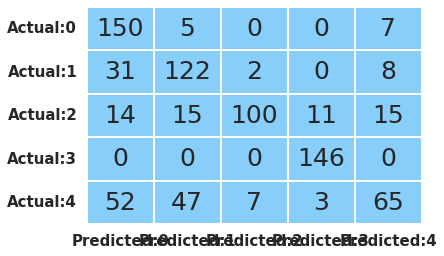

In [61]:
plot_confusion_matrix(KNN)

In [62]:
update_score_card(model_name= 'KNN')

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.57625,0.57625,0.57625,0.469232,0.57625
1,SVC,0.59125,0.59125,0.59125,0.488052,0.59125
2,KNN,0.72875,0.72875,0.72875,0.661198,0.72875


# 6.4 Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
GNB=classifier.fit(X_train, y_train)

In [64]:
y_pred = classifier.predict(X_test)

In [65]:
print(get_test_report(GNB))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42       162
           1       0.38      0.38      0.38       163
           2       0.97      0.83      0.89       155
           3       0.93      0.97      0.95       146
           4       0.49      0.57      0.53       174

    accuracy                           0.62       800
   macro avg       0.64      0.63      0.63       800
weighted avg       0.63      0.62      0.62       800



In [66]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.62125


In [67]:
kappa_score(GNB)

0.5257594403022305

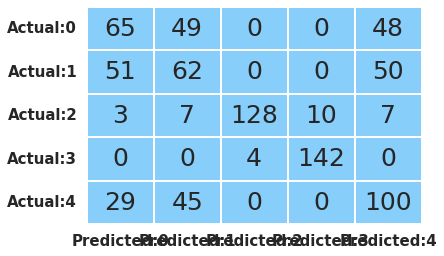

In [68]:
plot_confusion_matrix(GNB)

In [69]:
update_score_card(model_name= 'Naive Bayes')

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.57625,0.57625,0.57625,0.469232,0.57625
1,SVC,0.59125,0.59125,0.59125,0.488052,0.59125
2,KNN,0.72875,0.72875,0.72875,0.661198,0.72875
3,Naive Bayes,0.62125,0.62125,0.62125,0.525759,0.62125


# 6.5 Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Decision_tree=classifier.fit(X_train, y_train)

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
print(get_test_report(Decision_tree))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       162
           1       0.74      0.73      0.73       163
           2       0.96      0.88      0.92       155
           3       0.98      0.99      0.99       146
           4       0.69      0.64      0.66       174

    accuracy                           0.81       800
   macro avg       0.82      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



In [73]:
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.80625


In [74]:
kappa_score(Decision_tree)

0.7576501445304178

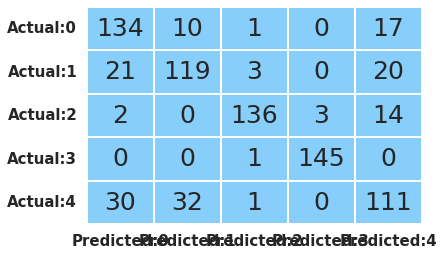

In [75]:
plot_confusion_matrix(Decision_tree)

In [76]:
update_score_card(model_name='Decision Tree')

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.57625,0.57625,0.57625,0.469232,0.57625
1,SVC,0.59125,0.59125,0.59125,0.488052,0.59125
2,KNN,0.72875,0.72875,0.72875,0.661198,0.72875
3,Naive Bayes,0.62125,0.62125,0.62125,0.525759,0.62125
4,Decision Tree,0.80625,0.80625,0.80625,0.757650,0.80625


# 6.6 Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators =40, random_state = 0)
Random_forest=forest.fit(X_train,y_train)


In [78]:
RandomForestClassifier(n_estimators=40, random_state=0)
y_pred = forest.predict(X_test)

In [79]:
print(get_test_report(Random_forest))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       162
           1       0.81      0.82      0.81       163
           2       0.98      0.86      0.91       155
           3       0.97      1.00      0.98       146
           4       0.78      0.71      0.74       174

    accuracy                           0.86       800
   macro avg       0.87      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



In [80]:
acc6 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc6}")

Accuracy score: 0.85875


In [81]:
kappa_score(Random_forest)

0.8233319132137566

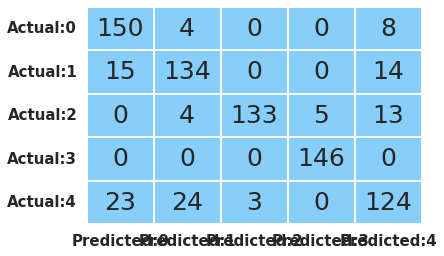

In [82]:
plot_confusion_matrix(Random_forest)

In [83]:
update_score_card(model_name= 'Random Forest')

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.57625,0.57625,0.57625,0.469232,0.57625
1,SVC,0.59125,0.59125,0.59125,0.488052,0.59125
2,KNN,0.72875,0.72875,0.72875,0.661198,0.72875
3,Naive Bayes,0.62125,0.62125,0.62125,0.525759,0.62125
4,Decision Tree,0.80625,0.80625,0.80625,0.757650,0.80625
5,Random Forest,0.85875,0.85875,0.85875,0.823332,0.85875


# 6.7 XGBoost

In [84]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
XGB= classifier.fit(X_train, y_train)

In [85]:
y_pred = classifier.predict(X_test)

In [86]:
print(get_test_report(XGB))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       162
           1       0.80      0.78      0.79       163
           2       0.99      0.88      0.93       155
           3       0.99      0.99      0.99       146
           4       0.78      0.78      0.78       174

    accuracy                           0.86       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.86      0.87       800



In [87]:
acc7 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc7}")

Accuracy score: 0.865


In [88]:
kappa_score(XGB)

0.8310734849891976

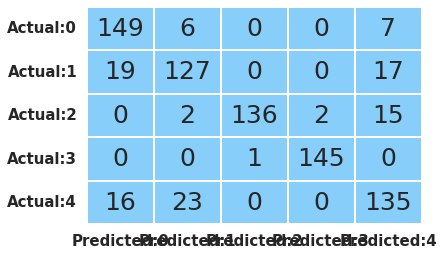

In [89]:
plot_confusion_matrix(XGB)

In [90]:
update_score_card(model_name= 'XGBoost')

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.57625,0.57625,0.57625,0.469232,0.57625
1,SVC,0.59125,0.59125,0.59125,0.488052,0.59125
2,KNN,0.72875,0.72875,0.72875,0.661198,0.72875
3,Naive Bayes,0.62125,0.62125,0.62125,0.525759,0.62125
4,Decision Tree,0.80625,0.80625,0.80625,0.757650,0.80625
5,Random Forest,0.85875,0.85875,0.85875,0.823332,0.85875
6,XGBoost,0.86500,0.86500,0.86500,0.831073,0.86500


# 6.8 Bagging Meta Estimator

In [91]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# build the model
meta_estimator = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))

# fit the model
Bagging= meta_estimator.fit(X_train, y_train)

In [92]:
y_pred = meta_estimator.predict(X_test)

In [93]:
print(get_test_report(Bagging))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       162
           1       0.76      0.74      0.75       163
           2       0.99      0.88      0.93       155
           3       0.97      0.99      0.98       146
           4       0.73      0.64      0.68       174

    accuracy                           0.83       800
   macro avg       0.84      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



In [94]:
acc8 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc8}")

Accuracy score: 0.82625


In [95]:
kappa_score(Bagging)

0.7827034273062846

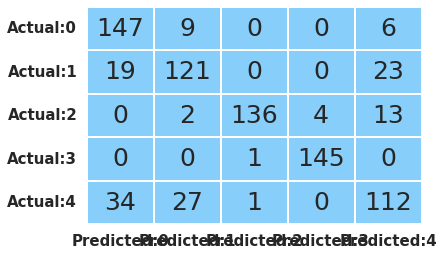

In [96]:
plot_confusion_matrix(Bagging)

In [97]:
update_score_card(model_name= 'Bagging Meta Estimator')

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.57625,0.57625,0.57625,0.469232,0.57625
1,SVC,0.59125,0.59125,0.59125,0.488052,0.59125
2,KNN,0.72875,0.72875,0.72875,0.661198,0.72875
3,Naive Bayes,0.62125,0.62125,0.62125,0.525759,0.62125
4,Decision Tree,0.80625,0.80625,0.80625,0.757650,0.80625
5,Random Forest,0.85875,0.85875,0.85875,0.823332,0.85875
6,XGBoost,0.86500,0.86500,0.86500,0.831073,0.86500
7,Bagging Meta Estimator,0.82625,0.82625,0.82625,0.782703,0.82625


# Comparing All Classification Models

In [98]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.57625,0.57625,0.57625,0.469232,0.57625
1,SVC,0.59125,0.59125,0.59125,0.488052,0.59125
2,KNN,0.72875,0.72875,0.72875,0.661198,0.72875
3,Naive Bayes,0.62125,0.62125,0.62125,0.525759,0.62125
4,Decision Tree,0.80625,0.80625,0.80625,0.757650,0.80625
5,Random Forest,0.85875,0.85875,0.85875,0.823332,0.85875
6,XGBoost,0.86500,0.86500,0.86500,0.831073,0.86500
7,Bagging Meta Estimator,0.82625,0.82625,0.82625,0.782703,0.82625


# 7. Conclusion

# Create visualization for all model with their Accuracy

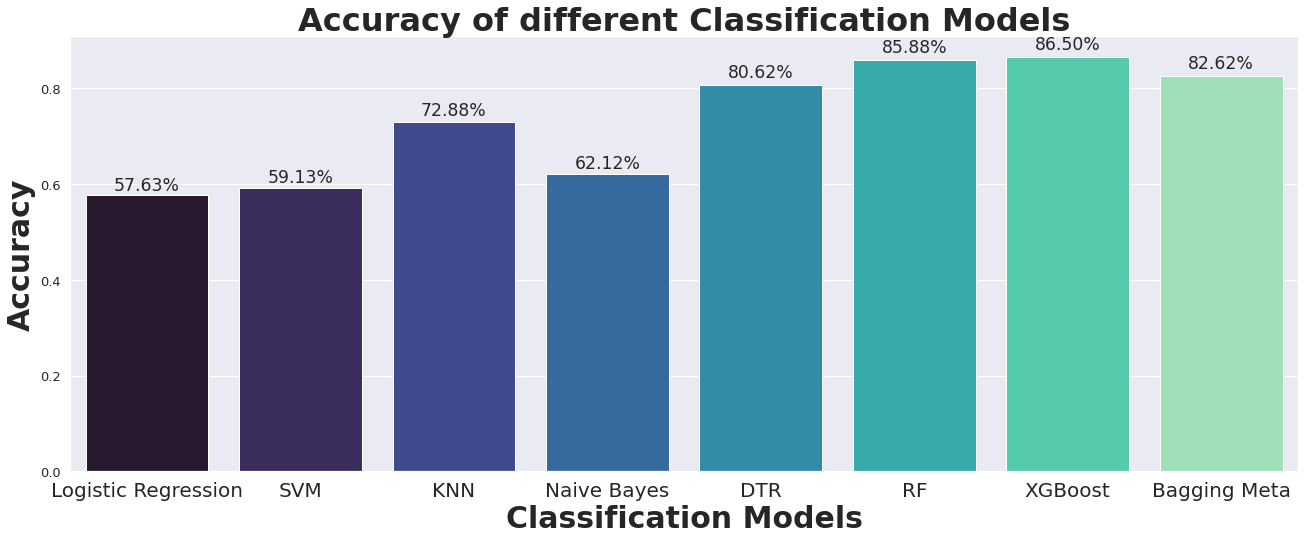

In [99]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
mylist.append(acc6)
mylist2.append("RF")
mylist.append(acc7)
mylist2.append("XGBoost")
mylist.append(acc8)
mylist2.append("Bagging Meta")

plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =3)
plt.xlabel("Classification Models", fontsize = 30, fontweight='bold' )
plt.ylabel("Accuracy", fontsize = 30, fontweight='bold')
plt.title("Accuracy of different Classification Models", fontsize = 32, fontweight='bold')
plt.xticks(fontsize = 20, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## By seeing the result XG Boost(84.62%) giving Best accuracy 